# Working with Raster Bands

## Import Packages & Load Data

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In addition to Rasterio, we'll be working with NumPy, which is a useful package for working with arrays, like our images. We will also be using Matplotlib's Pyplot module to visualize our data.

In [3]:
image_file = "/Users/mansi/Downloads/20170831_172754_101c_3b_Visual.tif"

In [4]:
satdat = rasterio.open(image_file)

# satdat is our open dataset object
print(satdat)

<open DatasetReader name='/Users/mansi/Downloads/20170831_172754_101c_3b_Visual.tif' mode='r'>


## Examining Metadata

In [14]:
# Get the image's coordinate reference system

satdat.crs

ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


CRS.from_wkt('PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]')

Because this image's CRS is in UTM, we know the projected units are in meters.

In [5]:
# Minimum bounding box in projected units (meters)


print(satdat.bounds)

BoundingBox(left=205437.0, bottom=3268524.0, right=230448.0, top=3280290.0)


In [6]:
# Get dimensions, in projected units (using the example GeoTIFF, that's meters)

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 25011.0, Height: 11766.0


In [7]:
# Number of rows and columns (pixels)

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 3922, Columns: 8337


In [8]:
# This dataset's projection uses meters as projected units.  What are the dimensions of a single pixel in meters?

xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres)) #sanity check

3.0 3.0
Are the pixels square: True


In [10]:
# Convert pixel coordinates on the image to geographic coordinates on the globe

# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = satdat.height - 1
col_max = satdat.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = satdat.transform * (row_min, col_min)
botright = satdat.transform * (row_max, col_max)

# These are UTM coordinates, not lat/long. UTM coordinates are printed with a cardinal direction (E/W, N/S)
print("Top left corner coordinates: {}".format(topleft)) 
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (205437.0, 3280290.0)
Bottom right corner coordinates: (217200.0, 3255282.0)


In [13]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# the dataset's profile:

satdat.profile

ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 8337, 'height': 3922, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]'), 'transform': Affine(3.0, 0.0, 205437.0,
       0.0, -3.0, 3280290.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

## Composing a scene

In [32]:
# Again, let's examine band count and indexes to ensure we have a 3-band visual image
print(satdat.count)
print(satdat.indexes)

3
(1, 2, 3)


Because we know we're look at a PlanetScope 3-band visual satellite image here, we can define the bands by their order:

In [35]:
# PlanetScope 3-band band order: BGR

blue, green, red = satdat.read()

In [36]:
# To construct a visual image, we will need the red, green, and blue bands

visual_image = np.dstack((red, green, blue))

## Visualizing an Image

Text(0.5, 1.0, 'Visual Image')

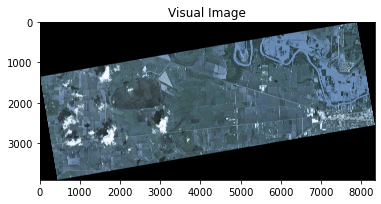

In [41]:
plt.figure(0)
plt.imshow(visual_image)
plt.title("Visual Image")

Congratulations!! Here we see an image of Houston during floods caused by Hurricane Harvey in August of 2017.